# Exploring the k-means clustering algorithm

## Machine Learning, Fall 2021

### Name: Andrew Wen

### General Sources
* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
* https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
* https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/
* https://www.datacamp.com/community/tutorials/k-means-clustering-python


In this notebook, we'll be exploring the process behind and attempting to implement parts of the famous $k$-means clustering algorithm. First, let's get down the basics behind the algorithm:

## The purpose and objective of the algorithm

The purpose of the $k$-means clustering algorithm, given a dataset $N$ (the set of points on which the algorithm is to be performed) and an integer $k$, is to divide the data points in $N$ into $k$ clusters as "best as possible". 

A clustering's "goodness" is defined by two things:
<ul>
<li> Intracluster distance - a clustering is better if the points in it are more similar to each other. A cluster's "intracluster distance" measures the sum of the distances from each point in that cluster to that cluster's centroid. The smaller a cluster's intracluster distance, the more similar the points in it are to each other, and the better that cluster is. </li> 
<li> Intercluster distance - a clustering is better if the clusters are well defined. That is, clusters are well separated from each other, else there is no reason two similar clusters cannot be combined into one cluster. The greater the intracluster distance between two clusters, the more well distinguished they are, which is indicative of a good clustering </li> 
</ul>
In general, a clustering is better the smaller the intracluster distances of each cluster and the larger the pairwise intercluster distances. In fact, there is a mathematical formula called the Dunn Index that reflects the optimality of a clustering:$$$$
$$\text{Dunn Index} = \frac{\min(\text{Intercluster distance}) \text{ across all Pairs of Clusters}}{\max(\text{Intracluster distances}) \text{ across all Clusters}}$$
$$$$
The greater the Dunn Index, the better the clustering - indeed, as a check, note that increasing Intercluster distances increases the numerator of the Dunn index, and that decreasing Intracluster distances decreases the numerator of the Dunn Index, both of which increase the Dunn index. 

So why do we pick the Dunn Index and not some other measure of goodness? There are other common metrics of "goodness" such as
<ul>
<li> sum of squares of each point to closest centroid </li> 
<li> sum of squares of pairwise distances of centroids </li> 
</ul>
though none of these work as well as the Dunn Index, since the former only depends on intracluster distances while the latter only depends on intercluster distances. 

Now, we create some functions to help with the computation of Intercluster and Intracluster distances:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the distance function, calculates the distance between two points. 

def distance(X, Y):
    sum = 0
    for i in range (0, len(X)):
        sum = sum + (X[i] - Y[i])**2    
    sum = np.sqrt(sum)
    return sum                

In [3]:
# This is the Intracluster distance formula, given a cluster of points. 

def intracluster(X):
    n, d = np.shape(X)
    
    centroid = np.zeros(d)
    for i in range(0, n):
        centroid = centroid + X[i]
    centroid = centroid * 1/n
    
    sum = 0
    for i in range(0, n):
        sum = sum + distance(centroid, X[i])
    return sum
    

In [4]:
# This is the Intercluster distance formula, given two clusters.

def intercluster(X, Y):
    n_X, d_X = np.shape(X)
    n_Y, d_Y = np.shape(Y)
    
    centroid_X = np.zeros(d_X)
    for i in range(0, n_X):
        centroid_X = centroid_X + X[i]
    centroid_X = centroid_X * 1/n_X
    
    centroid_Y = np.zeros(d_Y)
    for i in range(0, n_Y):
        centroid_Y = centroid_Y + Y[i]
    centroid_Y = centroid_Y * 1/n_Y
    
    return distance(centroid_X, centroid_Y)

In [5]:
# This is the Dunn Index, given a clustering X

def dunn_index(X):
    n = len(X)
    
    maxindex = 0
    for i in range (0, n):
        if intracluster(X[i]) > intracluster(X[maxindex]):
            maxindex = i
    
    mindex_x = 0
    mindex_y = 1
    for i in range(0, n):
        for j in range(0, i):
            if intercluster(X[i], X[j]) < intercluster(X[mindex_x], X[mindex_y]):
                mindex_x = i
                mindex_y = j
                
    ans = intercluster(X[mindex_x], X[mindex_y]) / intracluster(X[maxindex])
    return ans

After creating all relevant methods, let's actually apply them to an example clustering dataset (that is, one that has already been pre-clustered by some methods we do not know, and we are simply evaluating the "goodness" of this already made clustering):

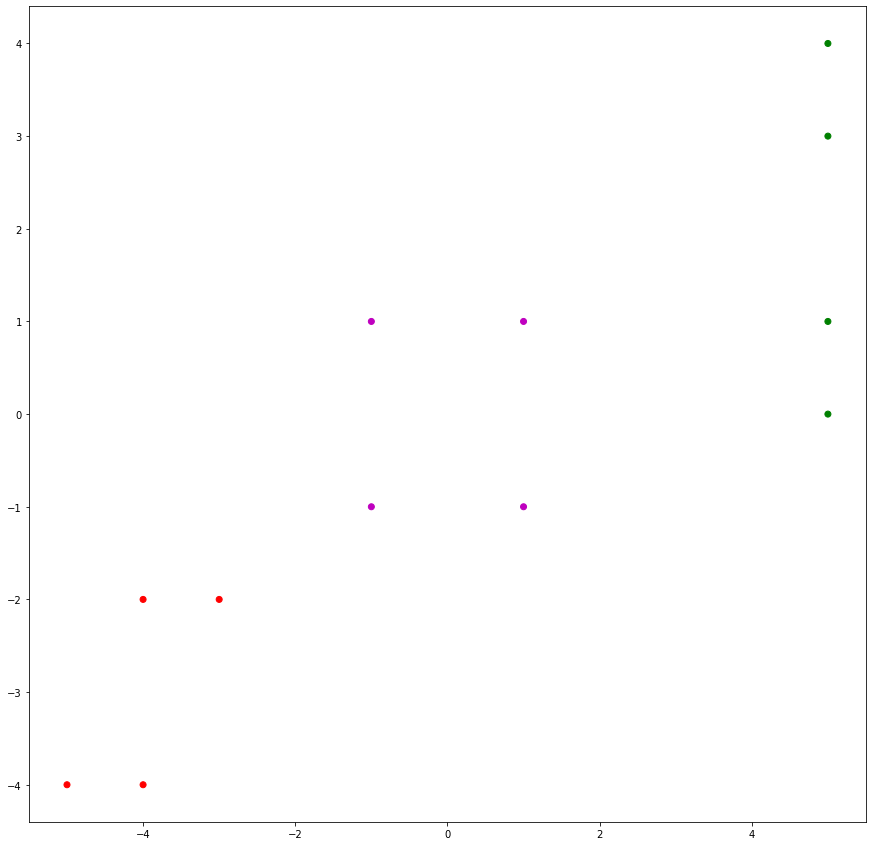

In [6]:
xs = [-1, -1, 1, 1, 5, 5, 5, 5, -5, -4, -4, -3]
ys = [1, -1, -1, 1, 0, 1, 3, 4, -4, -4, -2, -2]
colors = ['m', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r']

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xs, ys, c=colors)

plt.show()

Looking at the above clustering (as indicated by the colors), intuitively, this seems to be a good clustering, as it does seem that similarly located points belong to the same cluster. Let's comupte the Dunn index of this clustering:

In [7]:
cluster_m = []
cluster_g = []
cluster_r = []

for i in range(0, 12):
    if colors[i] == 'm':
        cluster_m.append([xs[i], ys[i]])
    elif colors[i] == 'g':
        cluster_g.append([xs[i], ys[i]])
    elif colors[i] == 'r':
        cluster_r.append([xs[i], ys[i]])

clustering = []
clustering.append(cluster_m)
clustering.append(cluster_g)
clustering.append(cluster_r)

print(dunn_index(clustering))

0.8333333333333334


Now, what if we tweak the clustering a little bit by moving the rightmost points of the red cluster to the magenta cluster?

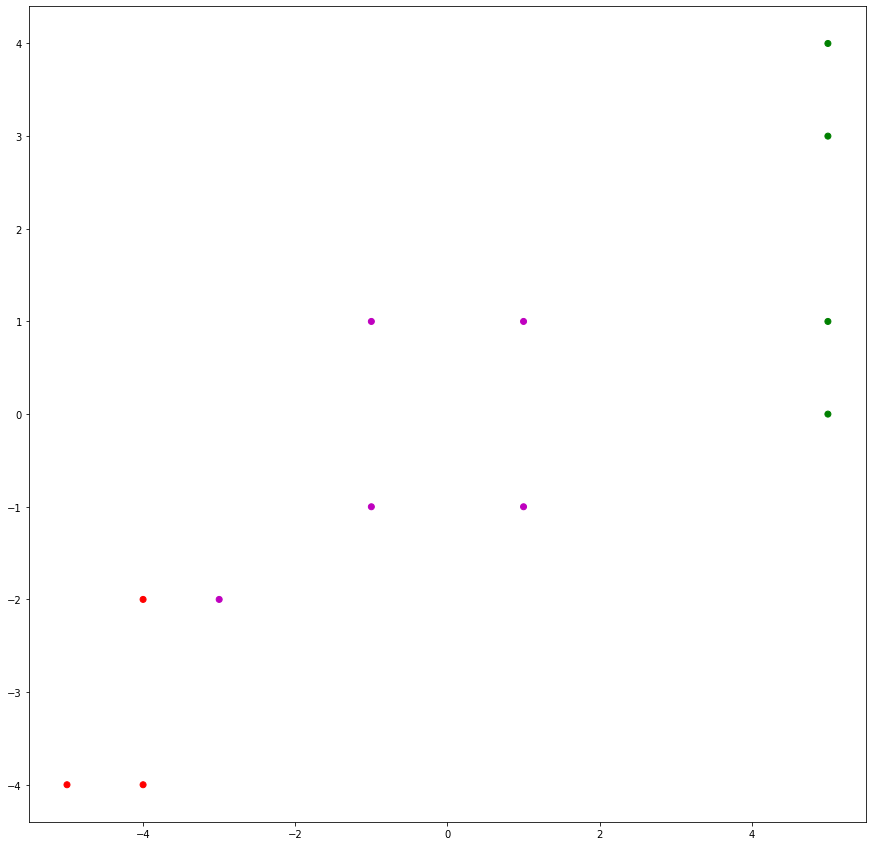

In [8]:
xs = [-1, -1, 1, 1, 5, 5, 5, 5, -5, -4, -4, -3]
ys = [1, -1, -1, 1, 0, 1, 3, 4, -4, -4, -2, -2]
colors = ['m', 'm', 'm', 'm', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'm']

xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xs, ys, c=colors)

plt.show()

The new Dunn Index would be:

In [9]:
cluster_m = []
cluster_g = []
cluster_r = []

for i in range(0, 12):
    if colors[i] == 'm':
        cluster_m.append([xs[i], ys[i]])
    elif colors[i] == 'g':
        cluster_g.append([xs[i], ys[i]])
    elif colors[i] == 'r':
        cluster_r.append([xs[i], ys[i]])

clustering = []
clustering.append(cluster_m)
clustering.append(cluster_g)
clustering.append(cluster_r)

print(dunn_index(clustering))

0.5336836617282176


We see that making such a tweak results in a clustering with a lower Dunn Index, which is implied to be "worse".

## The logic behind the algorithm

Now, after we have rigorously defined how to tell whether a clustering is "better" than another, how do we, given nothing but a dataset full of points and the number of clusters we wish to create, reach the clustering with the best possible Dunn Index? 

The $k$-means clustering algorithm follows the following steps:

1. Select $k$ points randomly to be the centroids of the $k$ clusters. 
2. Assign each point from the dataset to the centroid it is closest to, and let each centroid along with the points assigned to it form the clusters.
3. After establishing the clusters, we compute the centroids of each cluster, and repeat step 2 until the clusters converge/become constant. 

To simplify our implementation of the $k$-means algorithm, we one more method:

In [10]:
def closest_index(x, X): # takes in point x and array X of points, returns index of point in X closest to x
    n = len(X)
    index = 0
    for i in range(0, n):
        if distance(x, X[i]) < distance(x, X[index]):
            index = i
    return index

Now, the actual class:

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt

class k_means_clustering():
    
    def __init__(self) :        
        pass
        
    def fit(self, X, k): # fit to a dataset X to k clusters
        self.clustering = []
        n, d = np.shape(X) # n counts the number of data points in X, and d is dimension of the data points in X
        
        centroids = [] # create the centroids array 
        clusters = [] # create the set of clusters
        
        for i in range(0, k):
            clusters.append([]) # here, we are creating the k clusters and setting them to initially be empty
            centroids.append(X[i]) # here, we just set the initial array of centroids to be the first k points. 
        
        centroids = np.array(centroids)
        
        count = 1
        while True: 
            print("Iteration: " + f'{count}') 
            print("Our centroids are:")
            print(centroids)
            for i in range(0, n): # assigning each point to a cluster based on the centroid it is closest to
                clusters[closest_index(X[i], centroids)].append(X[i]) # for each X[i] in X, get index of centroid it is closest to, and add X[i]
                
            clustering_initial = []
            for i in range(0, k):
                clustering_initial.append(clusters[i])
            print("Our clusters are:")
            print(clustering_initial)
            print("The Dunn Index of this clustering is: " + f'{dunn_index(clustering_initial)}')
            
            for i in range(0, k): # get new centroids
                centroid = np.zeros(d)
                for j in range(0, len(clusters[i])):
                    centroid = centroid + clusters[i][j]
                centroid = centroid * 1/len(clusters[i])
                centroids[i] = centroid
            
            for i in range(0, k): # reset the clusters
                clusters[i] = []
            
            for i in range(0, n): # get new clustering from new centroids
                clusters[closest_index(X[i], centroids)].append(X[i]) # for each X[i] in X, get index of centroid it is closest to, and add X[i]
           
            if clusters == clustering_initial: # break out of loop if upon update nothing changes
                break
            
            for i in range(0, k): # reset the clusters
                clusters[i] = []
                
            count = count + 1
            print('------------------------------------')
            
        self.clustering = clustering_initial
        return self.clustering
    
    def predict(self, X, k): # run only after having run the fit method, this returns the cluster number for each point
        array = []
        n, d = np.shape(X)
        for i in range (0, n):
            for j in range(0, k):
                if(X[i] in self.clustering[j]):
                    array.append(j) 
        return np.array(array)
        
# the fit method successfully implements the logic behind the k-means algorithm    

Now let's test the class out on an example dataset: $$X = ([-1, -2], [-0, -3], [0, 0], [1, 1], [3, 1], [-1, 2], [10, 11], [9, 11], [7, 8], [8, 10], [-10, -3], [-7, -4], [-9, -2]).$$A plot of the data looks like this:

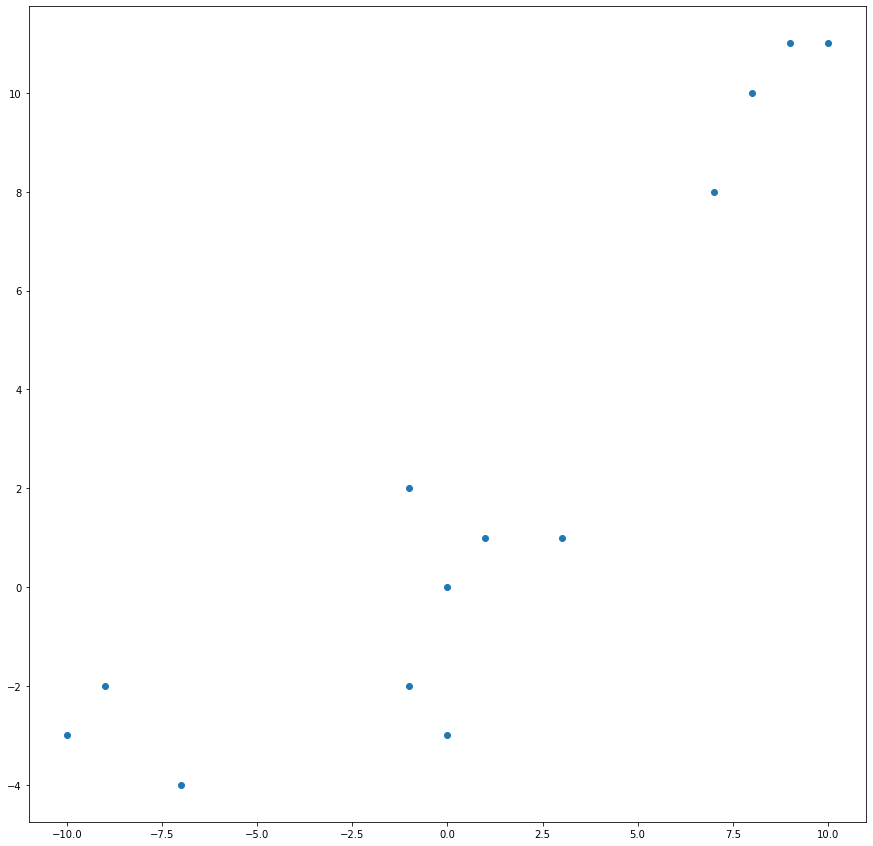

In [12]:
X = [[-1, -2], [-0, -3], [0, 0], [1, 1], [3, 1], [-1, 2], [10, 11], [9, 11], [7, 8], [8, 10], [-10, -3], [-7, -4], [-9, -2]]

xs = [element[0] for element in X] # creating x-coordinate array
ys = [element[1] for element in X] # creating y-coordinate array

xmin, xmax, ymin, ymax = -12, 12, -12, 12
ticks_frequency = 1

fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(xs, ys)

plt.show()

Now let's run the fit method on this dataset:

In [13]:
model = k_means_clustering()
model.fit(X, 3)

Iteration: 1
Our centroids are:
[[-1 -2]
 [ 0 -3]
 [ 0  0]]
Our clusters are:
[[[-1, -2], [-10, -3], [-7, -4], [-9, -2]], [[0, -3]], [[0, 0], [1, 1], [3, 1], [-1, 2], [10, 11], [9, 11], [7, 8], [8, 10]]]
The Dunn Index of this clustering is: 0.14023807154809617
------------------------------------
Iteration: 2
Our centroids are:
[[-6 -2]
 [ 0 -3]
 [ 4  5]]
Our clusters are:
[[[-10, -3], [-7, -4], [-9, -2]], [[-1, -2], [0, -3], [0, 0], [1, 1], [-1, 2]], [[3, 1], [10, 11], [9, 11], [7, 8], [8, 10]]]
The Dunn Index of this clustering is: 0.49678285951821655
------------------------------------
Iteration: 3
Our centroids are:
[[-8 -3]
 [ 0  0]
 [ 7  8]]
Our clusters are:
[[[-10, -3], [-7, -4], [-9, -2]], [[-1, -2], [0, -3], [0, 0], [1, 1], [3, 1], [-1, 2]], [[10, 11], [9, 11], [7, 8], [8, 10]]]
The Dunn Index of this clustering is: 0.7676756263772133


[[[-10, -3], [-7, -4], [-9, -2]],
 [[-1, -2], [0, -3], [0, 0], [1, 1], [3, 1], [-1, 2]],
 [[10, 11], [9, 11], [7, 8], [8, 10]]]

Now let's run the predict method, which tells us among the original dataset $X$, which cluster each point lies in:

In [14]:
model.predict(X, 3)

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0])

Now that we have written our own version of the k-means algorithm from scratch, just as any responsible programmer should do, we should reflect on the ethical implications on our algorithm.

After reading this article, https://sitn.hms.harvard.edu/flash/2020/racial-discrimination-in-face-recognition-technology/, I have been made aware of some possible problematic situations (more specifically, situations involving facial recognition and people categorization) that can arise from using clustering algorithms carelessly. 

Clustering algorithms play an important role in facial recognition softwares; after all, facial recognitions softwares are usually used to ID people, and are sometimes used to group people who are perceived to be from a similar racial/ethnic group. This is problematic, because uncareful uses of clustering like such can end up dehumanizing and sort of categorizing different people into the same group, which erases their sense of individualism. It can also lead to harmful stereotypes, such as Asian people having small eyes. 

Not only can uncareful clustering lead to stereotypes and erasure of individualism, more pressing issues involve how the training data for such a facial clustering algorithm can be obtained. A lot of surveillance systems obtain images of people's faces without their consent (especially in order to train facial recognition systems, which is surely illegal. 

Therefore, after being exposed to such issues with potentially unethical uses of clustering in the real world, I now have a better understanding of my own algorithm. 


# Examining the Titanic Survivor Dataset

## Machine Learning, Fall 2021

### General Sources
* https://www.datacamp.com/community/tutorials/k-means-clustering-python
* https://www.kaggle.com/timbaney1989/titanic-correlation-map-and-machine-learning

Now let's move onto something different and import a dataset from https://www.datacamp.com/community/tutorials/k-means-clustering-python (interesting, it is actually a survival dataset from the titanic crash) which we will examine:

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) # read in training data
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) # read in testing data

Before we do any clustering, it would be a wise idea to see what the data in this dataset actually means/represents. 

In [32]:
print("***** Train_Set *****")
print(train.head()) 
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

This seems to give us a big conglomerate of confusion information, so maybe we should start off with the basics: using the describe method:

In [33]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())


***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

From this step, it becomes more clear that this data is supposed to return a true/false for whether a passenger survived a disaster, depending on multiple features such as ID, class, age, sex, etc. Let's get all of the features:

In [34]:
print(train.columns.values)
train.info()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Quick overview of the meaning of all features from https://www.kaggle.com/blurredmachine/titanic-survival-a-complete-guide-for-beginners: 

"PassengerId: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

Sex: Passenger's sex. It's either Male or Female.

Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

SibSp: Number of siblings or spouses travelling with each passenger.

Parch: Number of parents of children travelling with each passenger.

Ticket: Ticket number.

Fare: How much money the passenger has paid for the travel journey.

Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

Embarked: Port from where the particular passenger was embarked/boarded."

Alright, now that we have understood the meanings behind all of the features of the dataset, now let us clean up missing data. 

In [35]:
train.shape 

(891, 12)

Upon calling train.shape, we see that there are 891 data points representing people, and 12 features. Now let's check for missing data:

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 entries with missing age, 687 with missing cabin, 2 with missing embarkment locations. 

We can obtain similar information from the test data:


In [21]:
test.shape

(418, 11)

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Now, let's take a look at the survival rates of passengers depending on different types of features:

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


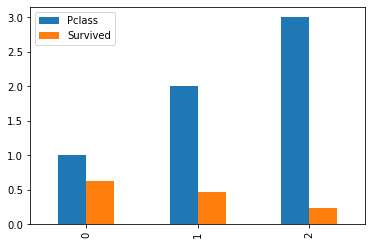

In [23]:
pclass_survival = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
pclass_survival.plot(kind='bar', subplots=False)
print(pclass_survival)

      Sex  Survived
0  female  0.742038
1    male  0.188908


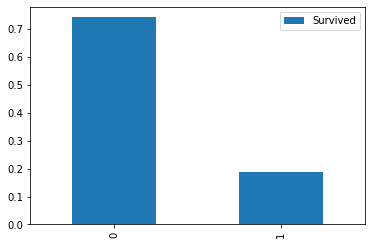

In [24]:
sex_survival = train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sex_survival.plot(kind='bar', subplots=False)
print(sex_survival)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


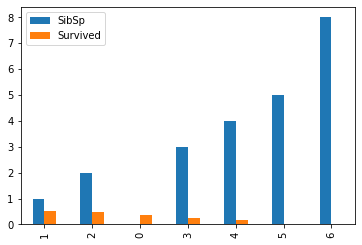

In [25]:
sibsp_survival = train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sibsp_survival.plot(kind='bar', subplots=False)
print(sibsp_survival)

A little bit of storytelling and interpretation here: 

We can see that clearly, people who were first class had a higher chance of surviving than those of second class and third class. It is interesting because clearly, there were more third class passengers than second class, and more second class than first class, but it seemed that the survival percentage for each class was inversely proportional to how many people were of that class. This does make sense though, because back in 1912, social structures were very rigid, and those of higher class were much more priveleged than those of lower class.

We also see that a lot more women survived than men from the data. This again makes sense, as usually during catastrophic events, saving priority usually goes to women and children, which is reflected in this data. 

Finally, we see that passengers with a large SibSp index (correlated to being part of larger families) had a generally lower chance of survival. This kind of makes sense: it is much harder to save entire large families, so maybe some people opted to die with their families if they were offered to be saved but their family members could not be. 

Let's take a look at a few more correlations between other features and survival rate. Here is age to death and survival:

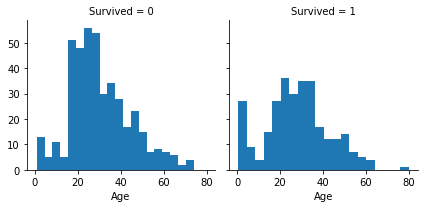

In [26]:
age_survival = sns.FacetGrid(train, col='Survived')
age_survival.map(plt.hist, 'Age', bins=20)

From this, we see that there were generally more younger people who died, yet also generally more younger people that survived. Among the histogram of those who survived, we see a large spike in the very left, which makes sense as survival priority was probably granted to infants. 

Lastly, let's take a look at correlation:

<AxesSubplot:>

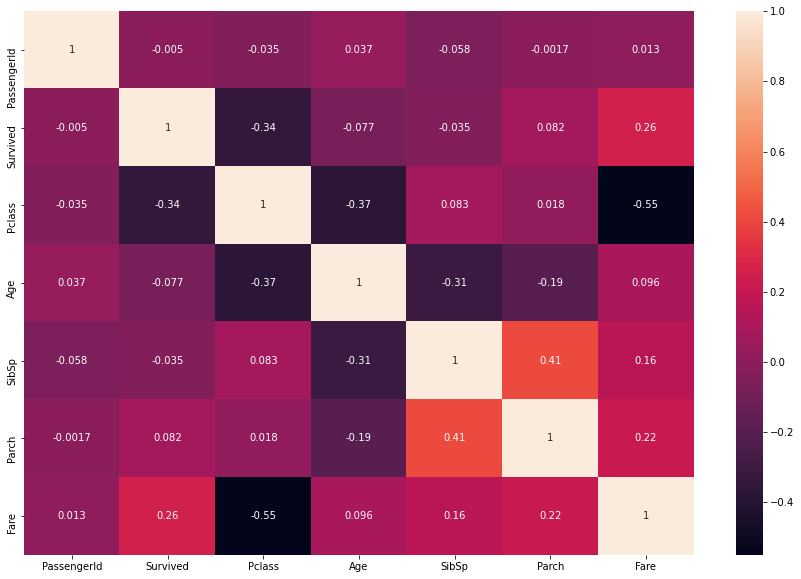

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

From this matrix, we see there is a strong negative correlation between survival rate and lower class, while there is a strong positive correlation between fare (the price one pays for a ticket) and survivability rate.

Alas, from all of this data modeling, we learn one thing: the wealth divide back in the 1900s was huge. Class and possession of wealth really made a huge difference, and still does (which brings to attention the issue of the wealth gap in modern society, and its potentially harmful effects). From analyzing all of this data, we can truly better understand the events of what happpened on that unfortunate night in 1912: who was saved and what influenced who was saved. 

Now we try to apply $k$-means to split the data points into 2 clusters, to predict whether people survive or not based on the other features. But to do that, we first must drop the non-numerical features: